In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [2]:
%autosave 0

Autosave disabled


In [3]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
#change 
tcp_tls_data = "./AWS_results/N.California/data/output_curl_gdrive.csv"
quic_data = "./AWS_results/N.California/data/output_quic_gdrive.csv"
gdrive = "./data2020/gdrive_id.csv"

In [6]:
scol_names = ['TimeOfMeasurement', 'Url', 'Ip', 'Port', 'DnsLookupTime', 'TCPHandshakeTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'HTTPVersion', 'Protocol']
tcol_names = ['TimeOfMeasurement', 'Url', 'Path', 'Ip', 'Port', 'DNSTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'Protocol']
g_names = ['size', 'id']

In [7]:
t = pd.read_csv(quic_data, ';', names=tcol_names, header=None)
s = pd.read_csv(tcp_tls_data, ';', names=scol_names, header=None)
gd = pd.read_csv(gdrive, ',', names=g_names, header=None)

In [8]:
t = t.dropna()
s=s.dropna()
s['TTFB']=s['TTFB']-s['DnsLookupTime']
s['TotalDownloadTime']=s['TotalDownloadTime']-s['DnsLookupTime']

In [9]:
import re
def extract_id(path):
    id = re.search('\*\/(.*)\?', path)
    return id.group(1)

In [10]:
t['id'] = t['Path'].apply(extract_id)

In [11]:
import re
def substitute(string):
    replaced = string
    if re.search('K', string):
        replaced = re.sub('K','', string)
    if re.search('M', string):
        replaced = re.sub('M','000', string)
    if re.search('G', string):
        replaced = re.sub('G','000000', string)
    return replaced

In [12]:
gd['size'] = gd['size'].apply(substitute)

In [13]:
s['id'] = s['Url'].apply(extract_id)

In [14]:
t['Url'] = t['Url'] + t['Path']

In [15]:
t = t.join(gd.set_index('id'), on='id', rsuffix='_right')

In [16]:
s = s.join(gd.set_index('id'), on='id', rsuffix='_right')

In [17]:
t['size'] = t['size'].astype(int)
s['size'] = s['size'].astype(int)
t['TotalDownloadTime'] = t['TotalDownloadTime'].astype(float)
s['TotalDownloadTime'] = s['TotalDownloadTime'].astype(float)

In [18]:
t['Throughput'] = (t['size']/t['TotalDownloadTime'])

In [19]:
s['Throughput'] = (s['size']/s['TotalDownloadTime'])

In [20]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,id,size,Throughput
0,1.589616e+09,doc-10-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.0.33,443,57.472,40.803,125.473,125.534,403.0,Q043,1C45gZCBtJHnjNACQIagfJ2fTRKQaZ9k6,1,0.007966
1,1.589616e+09,doc-10-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.0.33,443,0.851,41.608,122.685,122.746,403.0,Q046,1C45gZCBtJHnjNACQIagfJ2fTRKQaZ9k6,1,0.008147
2,1.589616e+09,doc-10-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.0.33,443,5.109,44.969,134.394,134.487,403.0,Q050,1C45gZCBtJHnjNACQIagfJ2fTRKQaZ9k6,1,0.007436
8,1.589616e+09,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.0.33,443,2.425,41.522,138.462,138.528,403.0,Q043,1yv4XxH7R74il-bxBS5Mz8Oiw6W7vwUFM,2,0.014438
9,1.589616e+09,doc-0g-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.0.33,443,0.835,40.665,139.441,139.503,403.0,Q046,1yv4XxH7R74il-bxBS5Mz8Oiw6W7vwUFM,2,0.014337


In [21]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol,id,size,Throughput
27585,1.589989e+09,doc-10-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.6.65,443,1.118,79.076,501.419,501.476,403.0,Q046,1ELbl7kPrCGNuk_6xX30vE7JBkSg0nLxf,500,0.997057
27586,1.589989e+09,doc-10-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.0.33,443,78.271,81.141,216.910,216.973,403.0,Q050,1ELbl7kPrCGNuk_6xX30vE7JBkSg0nLxf,500,2.304434
27592,1.589989e+09,doc-08-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.5.97,443,83.271,120.398,767.373,767.434,403.0,Q043,1oOlmk2JhtDoEK53iJfwDShB8jQ2WJGO8,1000,1.303044
27593,1.589989e+09,doc-08-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.5.97,443,761.885,78.810,222.914,222.974,403.0,Q046,1oOlmk2JhtDoEK53iJfwDShB8jQ2WJGO8,1000,4.484828
27594,1.589989e+09,doc-08-4c-docs.googleusercontent.com/docs/secu...,/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp...,172.217.5.97,443,44.558,960.026,119.894,119.955,403.0,Q050,1oOlmk2JhtDoEK53iJfwDShB8jQ2WJGO8,1000,8.336460


In [22]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol,id,size,Throughput
0,1589702402,doc-10-4c-docs.googleusercontent.com/docs/secu...,216.58.194.193,443,58.613,2.049,812.130,896.473,896.497,403,HTTP/1.1,TCP/TLS1.2,1C45gZCBtJHnjNACQIagfJ2fTRKQaZ9k6,1,0.001115
1,1589702404,doc-10-4c-docs.googleusercontent.com/docs/secu...,216.58.194.193,443,38.246,3.085,687.148,769.609,769.673,403,HTTP2,TCP/TLS1.2,1C45gZCBtJHnjNACQIagfJ2fTRKQaZ9k6,1,0.001299
2,1589702405,doc-0g-4c-docs.googleusercontent.com/docs/secu...,216.58.194.193,443,17.847,1.921,149.178,235.891,235.915,403,HTTP/1.1,TCP/TLS1.2,1yv4XxH7R74il-bxBS5Mz8Oiw6W7vwUFM,2,0.008478
3,1589702406,doc-0g-4c-docs.googleusercontent.com/docs/secu...,216.58.194.193,443,7.307,2.024,126.839,217.115,217.183,403,HTTP2,TCP/TLS1.2,1yv4XxH7R74il-bxBS5Mz8Oiw6W7vwUFM,2,0.009209
4,1589702407,doc-0o-4c-docs.googleusercontent.com/docs/secu...,216.58.194.193,443,4.211,1.981,63.250,159.827,159.853,403,HTTP/1.1,TCP/TLS1.2,1sGGy4K1J3p0OQlLxUgbgsErokyBADg6g,5,0.031279


In [23]:
s.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol,id,size,Throughput
2446,1589986513,doc-08-4c-docs.googleusercontent.com/docs/secu...,172.217.0.33,443,51.525,2.011,1511.426,1616.116,1616.197,403,HTTP2,TCP/TLS1.2,1Zr-g4qROFzaq_vZ4JnHneEb9JyRSUBXb,20,0.012375
2447,1589986518,doc-0s-4c-docs.googleusercontent.com/docs/secu...,172.217.0.33,443,61.049,1.974,1889.530,1981.710,1981.732,403,HTTP/1.1,TCP/TLS1.2,1yaWxao4WnEPwFSifCvpiMNTqnXSinoV3,50,0.025230
2448,1589987431,doc-00-4c-docs.googleusercontent.com/docs/secu...,172.217.5.97,443,384.157,16.340,4697.503,13561.649,13561.690,403,HTTP/1.1,TCP/TLS1.2,1n4w3UAJg8_g3RKTlEnfbqi10NbywEpRS,20000,1.474742
2449,1589988316,doc-0s-4c-docs.googleusercontent.com/docs/secu...,172.217.6.65,443,51.969,1.965,1836.959,1983.894,1983.915,403,HTTP/1.1,TCP/TLS1.2,1yaWxao4WnEPwFSifCvpiMNTqnXSinoV3,50,0.025203
2450,1589988323,doc-0s-4c-docs.googleusercontent.com/docs/secu...,172.217.6.65,443,47.472,5.190,4399.511,4494.559,4494.628,403,HTTP2,TCP/TLS1.2,1yaWxao4WnEPwFSifCvpiMNTqnXSinoV3,50,0.011124


In [24]:
gd.head()

,size,id
0,1,1C45gZCBtJHnjNACQIagfJ2fTRKQaZ9k6
1,2,1yv4XxH7R74il-bxBS5Mz8Oiw6W7vwUFM
2,5,1sGGy4K1J3p0OQlLxUgbgsErokyBADg6g
3,10,1k7mg8XpQmW-jpO85yq3giwVUeL82NJhx
4,20,1Zr-g4qROFzaq_vZ4JnHneEb9JyRSUBXb


In [25]:
t = t.dropna()
s = s.dropna()

In [26]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [27]:
quic4, quic6 = filter_by_ip(t, column = 'Ip')

In [28]:
tcp4, tcp6 = filter_by_ip(s, column = 'Ip')

In [29]:
#quic4 = quic4.loc[quic4['size']<500]
#tcp4 = tcp4.loc[tcp4['size']<500]

In [30]:
quic43 = quic4.loc[t['Protocol'] == 'Q043']
quic46 = quic4.loc[t['Protocol'] == 'Q046']
quic50 = quic4.loc[t['Protocol'] == 'Q050']
quicietf = quic4.loc[t['Protocol'] == 'FF000018']

In [31]:
quic43_6 = quic6.loc[t['Protocol'] == 'Q043']
quic46_6 = quic6.loc[t['Protocol'] == 'Q046']
quic50_6 = quic6.loc[t['Protocol'] == 'Q050']
quicietf_6 = quic6.loc[t['Protocol'] == 'FF000018']

In [32]:
tcp12 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.3']

In [33]:
tcp12_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.3']

In [34]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 = Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x5 = Cdf.MakeCdfFromList(quicietf['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['ConnectionEstablishmentTime'].values)
x2 = Cdf.MakeCdfFromList(tcp12['ConnectionEstablishmentTime'].values)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.
findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


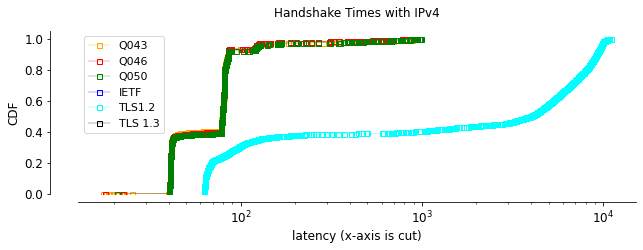

In [35]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#Q0ietf
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([20, 100])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/N.California/gdrive/handshake_times_ipv4_otherthan200.png', format='png', bbox_inches='tight')


In [36]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic46['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic50['TTFB'].values)
x5 = Cdf.MakeCdfFromList(quicietf['TTFB'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TTFB'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TTFB'].values)

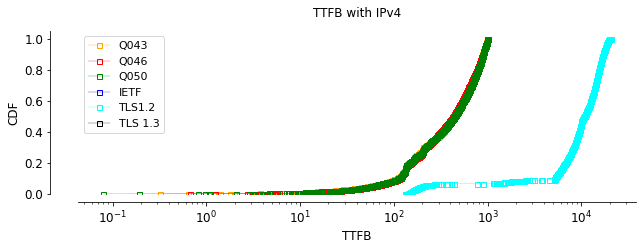

In [37]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#IETF
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([100, 600])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/N.California/gdrive/TTFB_ipv4.png', format='png', bbox_inches='tight')

In [38]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x5 = Cdf.MakeCdfFromList(quicietf['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TotalDownloadTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TotalDownloadTime'].values)

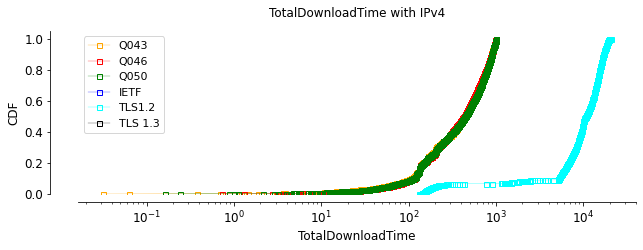

In [39]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#IETF
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([100,800])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/N.California/gdrive/TotalDownloadTime_ipv4.png', format='png', bbox_inches='tight')

In [40]:
x = Cdf.MakeCdfFromList(quic43['Throughput'].values)
x1 =Cdf.MakeCdfFromList(quic46['Throughput'].values)
x3 = Cdf.MakeCdfFromList(quic50['Throughput'].values)
x5 = Cdf.MakeCdfFromList(quicietf['Throughput'].values)
x4 = Cdf.MakeCdfFromList(tcp13['Throughput'].values)
x2 =Cdf.MakeCdfFromList(tcp12['Throughput'].values)

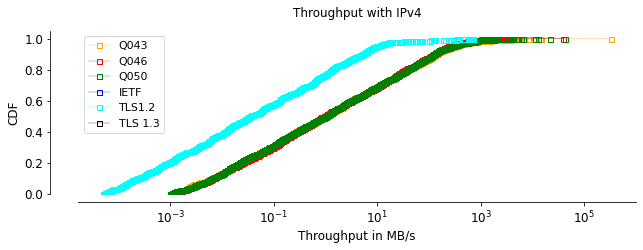

In [41]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q046
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q050
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#IETF
plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
ax.set_ylim([0,1.05])
#ax.set_xlim([0,700])
#ax.set_xlim([0,10])
ax.set_xscale('log')
ax.set_xlabel('Throughput in MB/s', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q046', 'Q050', 'IETF', 'TLS1.2', 'TLS 1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
#ax3.set_ylabel('[\'16thMay - \'20thMay')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Throughput with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/N.California/gdrive/Throughput_ipv4.png', format='png', bbox_inches='tight')

In [42]:
quic_mean= quic4.groupby('size', as_index=False).mean()
tcp_mean= tcp4.groupby('size', as_index=False).mean()

quic_mean.head()

quic_mean.tail()

,size,TimeOfMeasurement,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Throughput
11,5000,1.589783e+09,36.937447,76.231192,473.378854,473.459408,403.0,33.294217
12,10000,1.589783e+09,39.870460,80.709401,443.911626,445.057211,403.0,132.350072
13,20000,1.589783e+09,39.752767,74.950279,467.045281,464.936527,403.0,628.735491
14,50000,1.589783e+09,50.899690,86.892394,457.808764,457.871947,403.0,379.799198
15,100000,1.589783e+09,43.861382,78.338365,481.245314,481.306707,403.0,596.899173


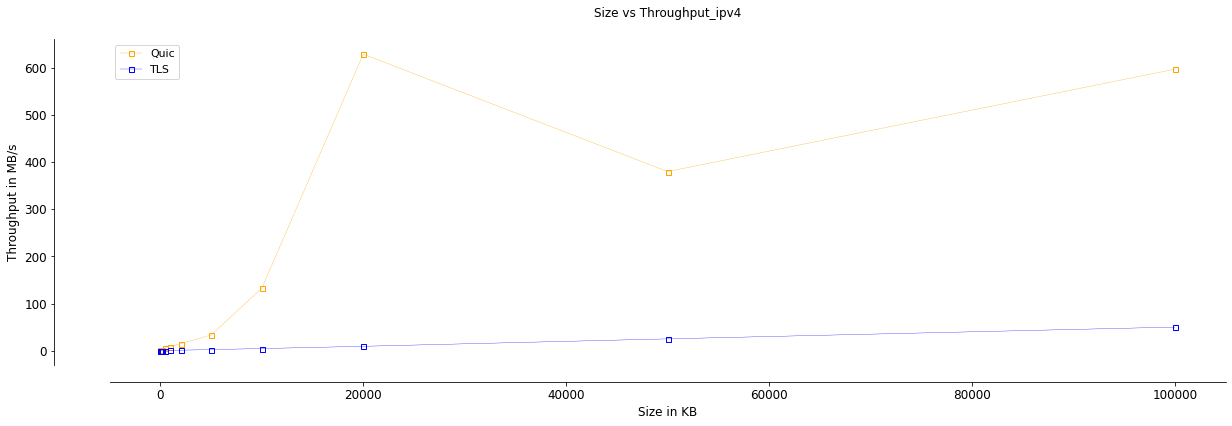

In [43]:
fig = plt.figure(figsize = (20,6))
plt.rcParams['font.size'] = 12
ax = plt.gca()
#yticks = np.arange(1000,100000000,10000)

#Quic
#plt.plot(quic4['size'], quic4['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

#plt.plot(tcp4['size'], tcp4['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
plt.plot(quic_mean['size'], quic_mean['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')

plt.plot(tcp_mean['size'], tcp_mean['Throughput'], marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')

ax = fig.axes[0]
ax.grid(False)
#ax.set_yticks(yticks)
#ax.set_ylim([0,700])
#ax.set_xlim([0,60000])
#ax.set_xlim([0,10])
ax.set_xscale('linear')
ax.set_xlabel('Size in KB', fontsize=12)
ax.set_ylabel('Throughput in MB/s', fontsize=12)

plt.legend(['Quic', 'TLS'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Size vs Throughput_ipv4', fontsize=12, y=1.05)
plt.savefig('./AWS/N.California/gdrive/sizevsThroughput_ipv4.png', format='png', bbox_inches='tight')

